<a href="https://colab.research.google.com/github/Arox-Y/employee_salary_prediction/blob/master/employee_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_name = './Salary_Data.csv'


Sample Data:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


<ipython-input-2-ceb64c756ee6>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')



Model Performance:
Mean Squared Error: 329372336.34
R² Score: 0.88

Model Coefficients:
Age: 1094.32
Years of Experience: 3984.85
Gender_Male: 923.63
Gender_Other: -23054.49
Education Level_Bachelor's Degree: -52270.89
Education Level_High School: -62308.45
Education Level_Master's: -6407.39
Education Level_Master's Degree: -43292.30
Education Level_PhD: -36819.65
Education Level_phD: -9652.02
Job Title_Accountant: 0.00
Job Title_Administrative Assistant: -46034.57
Job Title_Back end Developer: 74600.83
Job Title_Business Analyst: 539.17
Job Title_Business Development Manager: 7264.17
Job Title_Business Intelligence Analyst: 0.00
Job Title_CEO: 75605.08
Job Title_Chief Data Officer: 124854.36
Job Title_Chief Technology Officer: 114220.94
Job Title_Content Marketing Manager: 64936.30
Job Title_Copywriter: 0.00
Job Title_Creative Director: 5524.08
Job Title_Customer Service Manager: -25475.07
Job Title_Customer Service Rep: -0.00
Job Title_Customer Service Representative: 27869.00
Job T

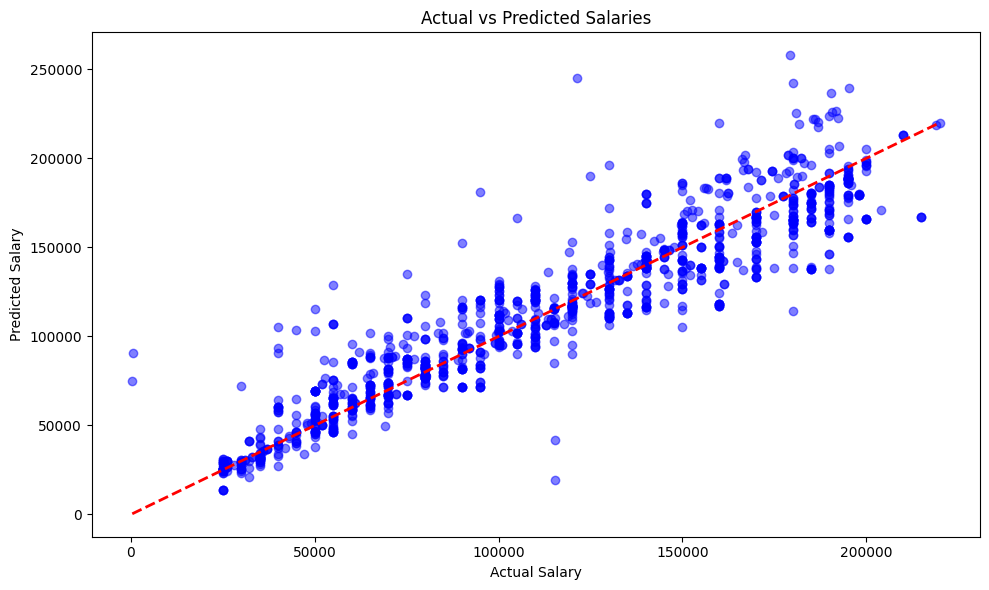


Predicted Salary for new employee: $138785.58


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


np.random.seed(42)


file_name = './Salary_Data.csv'

try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
    raise


print("\nSample Data:")
print(data.head())


feature_columns = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']
target_column = 'Salary'


missing_cols = [col for col in feature_columns + [target_column] if col not in data.columns]
if missing_cols:
    print(f"\nError: Missing columns in dataset: {missing_cols}")
    print("Available columns:", list(data.columns))
else:

    X = data[feature_columns]
    y = data[target_column]


    X = X.fillna(method='ffill')
    y = y.fillna(y.mean())


    X_encoded = pd.get_dummies(X, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)


    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42
    )


    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    print("\nModel Coefficients:")
    for feature, coef in zip(X_encoded.columns, model.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title('Actual vs Predicted Salaries')
    plt.tight_layout()
    plt.show()


    new_employee = pd.DataFrame({
        'Age': [30],
        'Gender': ['Male'],
        'Education Level': ['Bachelor'],
        'Job Title': ['Data Analyst'],
        'Years of Experience': [5]
    })


    new_employee_encoded = pd.get_dummies(new_employee)
    new_employee_encoded = new_employee_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    predicted_salary = model.predict(new_employee_encoded)
    print(f"\nPredicted Salary for new employee: ${predicted_salary[0]:.2f}")
